#### $$x^2 - \frac{e^x}{5} = 0$$

In [221]:
from math import *

ln = lambda x: log(x, e)

def f(x : float) -> float:
    return x**2 - exp(x) / 5

iterations = 10

def check_method(method, x0 : float):
    x = method(x0)
    print(f"x = {x}, ε = {abs(f(x))}")

$f(x) = x^2 - \frac{e^x}{5}$

Из геометрических соображений видно, что уравнение $f(x) = 0$ имеет 3 решения, по одному на каждом из интервалов: 

$I_1 = (-2; -0.1)$, $I_2 = (0.1; 2)$, $I_3 = (2; +\infty)$

Для их нахождения построим МПИ:

**1)** $e^x - 5x^2 = 0 \Leftrightarrow x = \ln(5x^2)$

$x_{n+1} = \varphi(x_n)$, где $\varphi(x) = \ln(5x^2)$

$|\varphi'(x)| = \frac{2}{|x|} \Rightarrow$ отображение является сжимающим на $I_3$.

**2)** $xe^x - 5x^3 = 0 \Leftrightarrow x = \sqrt[3]{\frac{xe^x}{5}}$

$x_{n+1} = \psi(x_n)$, где $\psi(x) = \sqrt[3]{\frac{xe^x}{5}}$

$|\psi'(x)| = \frac{|1+x|}{3}\sqrt[3]{\frac{e^x}{5x^2}}$

Анализ показывает, что $|\psi'(x)| < 1$ на $I_1$ и $I_2 \Rightarrow$ отображение является сжимающим на этих интервалах.

In [222]:
def find_solution_by_phi(x0 : float) -> float:
    x = x0
    for n in range(iterations):
        x = ln(5 * x * x)
    return x

def find_solution_by_psi(x0 : float) -> float:
    x = x0
    for n in range(iterations):
        x = cbrt(x * exp(x) / 5)
    return x

check_method(find_solution_by_phi, 10)
check_method(find_solution_by_psi, 1)
check_method(find_solution_by_psi, -1)

x = 4.708472854286686, ε = 0.006822681711739165
x = 0.6060105489732267, ε = 0.0006280426096200165
x = -0.3714177857271311, ε = 2.9301973680784243e-08


### Метод Ньютона

$f'(x) \approx \frac{f(x + \varepsilon_d) - f(x - \varepsilon_d)}{2\varepsilon_d}$

In [223]:
eps_d = 1e-5

def df(x):
    return (f(x + eps_d) - f(x - eps_d)) / (2 * eps_d)

def find_solution_by_Newton(x0 : float) -> float:
    x = x0
    for n in range(iterations):
        x = x - f(x) / df(x)
    return x

check_method(find_solution_by_Newton, 10)
check_method(find_solution_by_Newton, 1)
check_method(find_solution_by_Newton, -1)

x = 4.7079379182533705, ε = 1.5873702352564578e-09
x = 0.6052671213146186, ε = 1.1102230246251565e-16
x = -0.37141775245917386, ε = 0.0


#### $$ \begin{cases} tg(xy + 0.4) = x^2\\ 0.6x^2 + 2y^2 = 1 \end{cases} $$

In [224]:
from matrixlib import *
import matplotlib.pyplot as plt

def f(u : Vector) -> Vector:
    x = u[0]
    y = u[1]
    return Vector(tan(x*y + 0.4) - x*x, 0.6*x*x + 2*y*y - 1)

iterations = 200
norm = get_Euclidian_norm

###################################################
#comparsion FPI and Newton:
class comparsion_plots:
    def __init__(self):
        self.plots = []

    def begin_plot(self, name : str):
        self.plots += [[name, []]]

    def add_point_to_plot(self, u : Vector):
        self.plots[-1][1] += [norm(f(u))]

    def show_result(self):
        for plot in self.plots:
            plt.plot([(it + 1) for it in range(len(plot[1]))], plot[1], label=plot[0])
        plt.title("FPI vs Newton")
        plt.xlabel("iteration")
        plt.ylabel(r"$\epsilon$")
        plt.yscale("log")
        plt.xscale("log")
        plt.legend()
        plt.show()

plots = comparsion_plots()
###################################################

def check_method(method, u0 : Vector, plots : comparsion_plots = None):
    u = method(u0, plots)
    print(f"u = ({u[0]}, {u[1]})ᵀ, ε = {norm(f(u))}")

Второе уравнение задаёт эллипс с полуосями $a = \sqrt{\frac{5}{3}}, b = \frac{1}{\sqrt{2}}$.

Тогда решения должны принадлежать множеству $[-\sqrt{\frac{5}{3}}, \sqrt{\frac{5}{3}}]\times[-\frac{1}{\sqrt{2}}, \frac{1}{\sqrt{2}}]$.

Построение графика первого уравнения показывает, что система имеет \
всего 4 решения, по одному на каждый квадрант.\
Для их нахождения постоим МПИ.

Исходную систему можно переписть в виде:

$\begin{cases} 
x = \sqrt[3]{x \; tg(xy + 0.4)}\\ 
y^2 = 0.5 - 0.3x^2 
\end{cases}$

Откуда получаем два метода:

**1)** 
$\begin{cases} 
x_{n+1} = \varphi_1(x_n, y_n) = \sqrt[3]{x_n \; tg(x_ny_n + 0.4)}\\ 
y_{n+1} = \varphi_2(x_n, y_n) = \sqrt{0.5 - 0.3x_n^2} 
\end{cases}$

**2)** 
$\begin{cases} 
x_{n+1} = \psi_1(x_n, y_n) = \sqrt[3]{x_n \; tg(x_ny_n + 0.4)}\\ 
y_{n+1} = \psi_2(x_n, y_n) = -\sqrt{0.5 - 0.3x_n^2} 
\end{cases}$

Для нахождения областей, в которых эти отображения являются сжимающими, выпишем их матрицы Якоби:

$J_\varphi(x, y) = \begin{pmatrix}
\frac{tg(xy + 0.4) + xy\cos^{-2}(xy + 0.4)}{3\left(\sqrt[3]{x \; tg(xy + 0.4)}\right)^2} & 
\frac{x^2\cos^{-2}(xy + 0.4)}{3\left(\sqrt[3]{x \; tg(xy + 0.4)}\right)^2}\\
-\frac{0.3x}{\sqrt{0.5 - 0.3x^2}} & 0
\end{pmatrix}$


$J_\psi(x, y) = \begin{pmatrix}
\frac{tg(xy + 0.4) + xy\cos^{-2}(xy + 0.4)}{3\left(\sqrt[3]{x \; tg(xy + 0.4)}\right)^2} & 
\frac{x^2\cos^{-2}(xy + 0.4)}{3\left(\sqrt[3]{x \; tg(xy + 0.4)}\right)^2}\\
\frac{0.3x}{\sqrt{0.5 - 0.3x^2}} & 0
\end{pmatrix}$

Используя столбцовую норму можно показать, что:

$\varphi$ - является сжимающим в области $(0.96; 1.04) \times (0.18;0.62)$

$\varphi$ - является сжимающим в области $(-0.48; -0.32) \times (0.5;0.7)$

$\psi$ - является сжимающим в области $(-1.06; -0.94) \times (-0.6; -0.2)$

$\psi$ - является сжимающим в области $(0.32; 0.48) \times (-0.7; -0.5)$

С помощью графического калькулятора(Desmos), можно убедиться, что корни лежат в этих областях.

In [228]:
def find_solution_by_phi(u0 : Vector, plots : comparsion_plots) -> Vector:
    x = u0[0]
    y = u0[1]
    if plots: plots.begin_plot("FPI")
    for n in range(iterations):
        x, y = cbrt(x * tan(x*y + 0.4)), sqrt(0.5 - 0.3*x*x)
        if plots: plots.add_point_to_plot(Vector(x, y))
    return Vector(x, y)

def find_solution_by_psi(u0 : Vector, plots : comparsion_plots) -> Vector:
    x = u0[0]
    y = u0[1]
    if plots: plots.begin_plot("FPI")
    for n in range(iterations):
        x, y = cbrt(x * tan(x*y + 0.4)), -sqrt(0.5 - 0.3*x*x)
        if plots: plots.add_point_to_plot(Vector(x, y))
    return Vector(x, y)

check_method(find_solution_by_phi, Vector(1, 0.6), plots)
check_method(find_solution_by_phi, Vector(-0.4, 0.6))
check_method(find_solution_by_psi, Vector(-1, -0.5))
check_method(find_solution_by_psi, Vector(0.4, -0.6))

u = (1.048400141102623, 0.4126222767141883)ᵀ, ε = 6.661338147750939e-16
u = (-0.3798484443174809, 0.6758065905308093)ᵀ, ε = 8.326672684688674e-17
u = (-1.048400141102623, -0.4126222767141883)ᵀ, ε = 6.661338147750939e-16
u = (0.3798484443174809, -0.6758065905308093)ᵀ, ε = 8.326672684688674e-17


#### Метод Ньютона

In [226]:
eps_d = 1e-10 #differentiation accuracy
eps_l = 1e-10 #linear system solving accuracy

def solve_linear_system_by_Seidel(A : Matrix, f : Vector, x0 : Vector) -> Vector:
    f = A.T() * f
    A = A.T() * A
    n = A.n
    x = x0.copy()
    x_dual = Vector.zeros(n)
    while norm(A * x - f) > eps_l:
        for i in range(n):
            x_dual[i] = -(sum([A[i, j] * x_dual[j] for j in range(i) if i != j]) 
                          + sum([A[i, j] * x[j] for j in range(i+1, n) if i != j]) 
                          - f[i]) / A[i, i]
        x, x_dual = x_dual, x
    return x

def J(u : Vector) -> Matrix:
    dfx = (f(u + Vector(eps_d, 0)) - f(u - Vector(eps_d, 0))) / (2 * eps_d)
    dfy = (f(u + Vector(0, eps_d)) - f(u - Vector(0, eps_d))) / (2 * eps_d)
    return Matrix([(dfx[0], dfy[0]), (dfx[1], dfy[1])])

def find_solution_by_Newton(u0 : Vector, plots : comparsion_plots) -> Vector:
    u = u0.copy()
    if plots: plots.begin_plot("Newton")
    for n in range(iterations):
        du = solve_linear_system_by_Seidel(J(u), -f(u), Vector(0, 0))
        u += du
        if plots: plots.add_point_to_plot(u)
    return u

check_method(find_solution_by_Newton, Vector(1, 1), plots)
check_method(find_solution_by_Newton, Vector(-1, 1))
check_method(find_solution_by_Newton, Vector(-1, -1))
check_method(find_solution_by_Newton, Vector(1, -1))

u = (1.0484001411147057, 0.4126222767151872)ᵀ, ε = 2.0693746687230202e-11
u = (-0.3798484443014382, 0.6758065905347701)ᵀ, ε = 2.1982884291919772e-11
u = (-1.0484001411147057, -0.4126222767151872)ᵀ, ε = 2.0693746687230202e-11
u = (0.3798484443014382, -0.6758065905347701)ᵀ, ε = 2.1982884291919772e-11


#### Сравнение МПИ и метода Ньютона для решения в первом квадранте

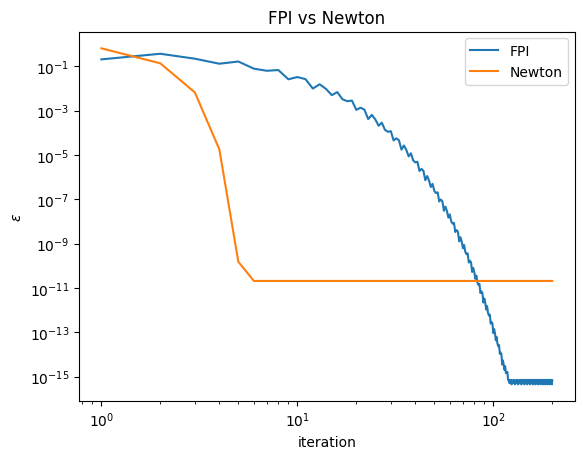

In [227]:
plots.show_result()